### Import libraries

In [136]:
import pandas as pd
import numpy as np
import re

import plotly.express as px
from plotly.subplots import make_subplots 
import plotly.graph_objects as go 
import seaborn as sns 
from matplotlib import pyplot as plt

import missingno as msno


### Load and explore data

In [137]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(f'Train shape: {train_data.shape}')
print(f'Test shape: {test_data.shape}')

Train shape: (8693, 14)
Test shape: (4277, 13)


Train data

In [138]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [139]:
# Exploring columns.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [140]:
# Checking null values.
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [141]:
train_data.isnull().sum() / train_data.shape[0]

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

<AxesSubplot:>

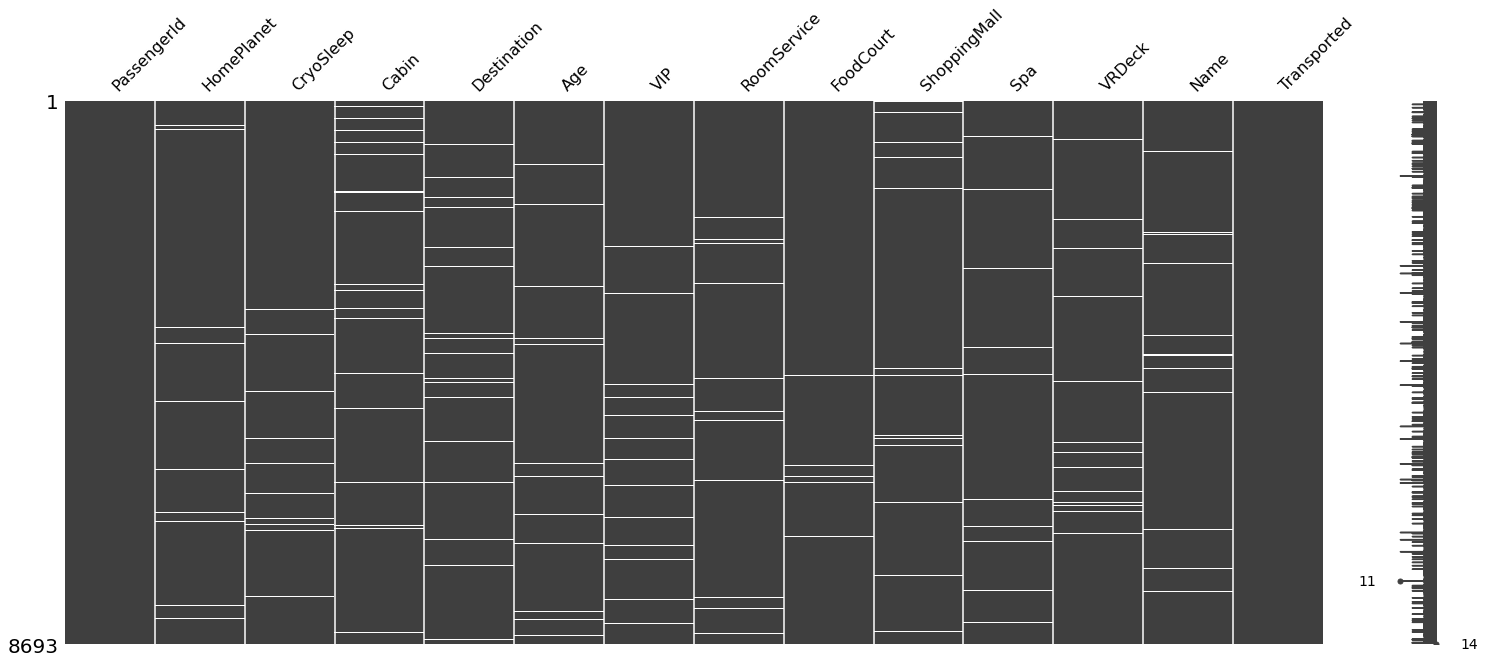

In [142]:
msno.matrix(train_data)

Test data.

In [143]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [144]:
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [145]:
test_data.isnull().sum() / test_data.shape[0]

PassengerId     0.000000
HomePlanet      0.020341
CryoSleep       0.021744
Cabin           0.023381
Destination     0.021510
Age             0.021277
VIP             0.021744
RoomService     0.019172
FoodCourt       0.024784
ShoppingMall    0.022913
Spa             0.023615
VRDeck          0.018705
Name            0.021978
dtype: float64

<AxesSubplot:>

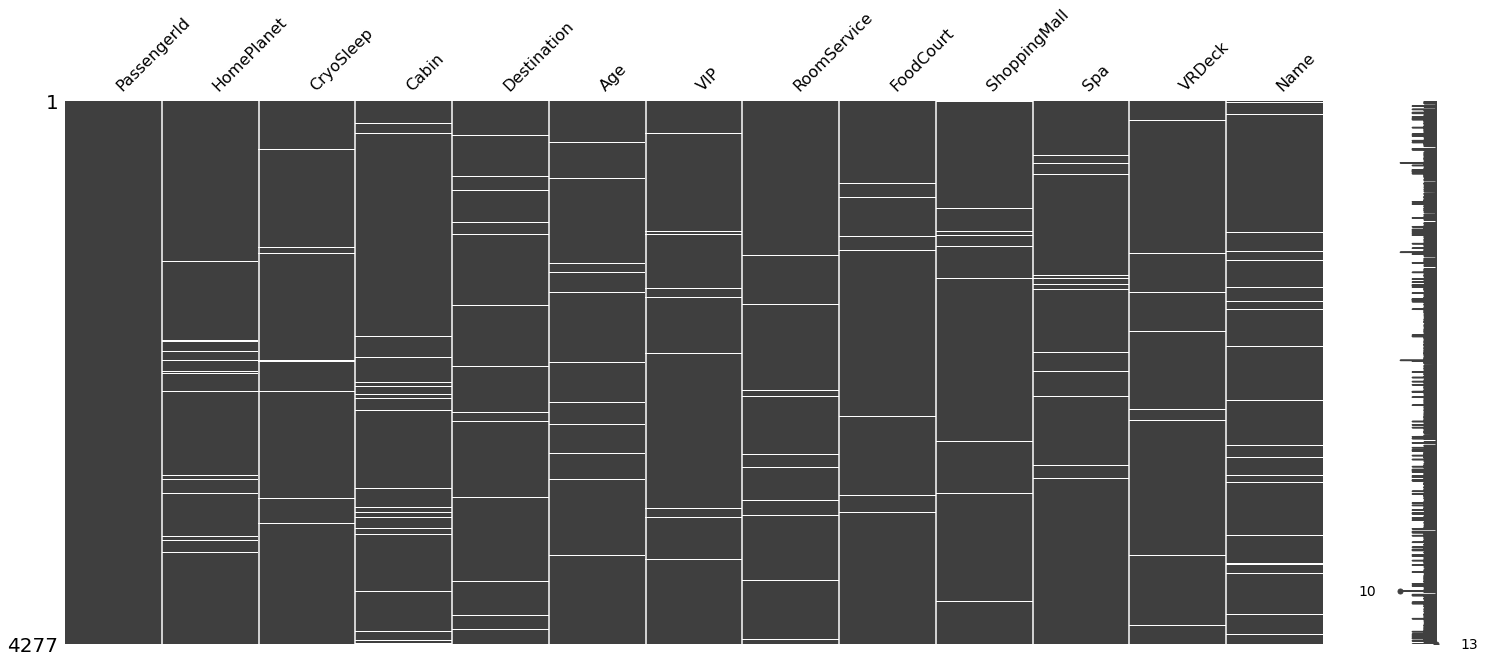

In [146]:
msno.matrix(test_data)

We dont want to touch anything out of test data, so we will delete all NaNs

<AxesSubplot:>

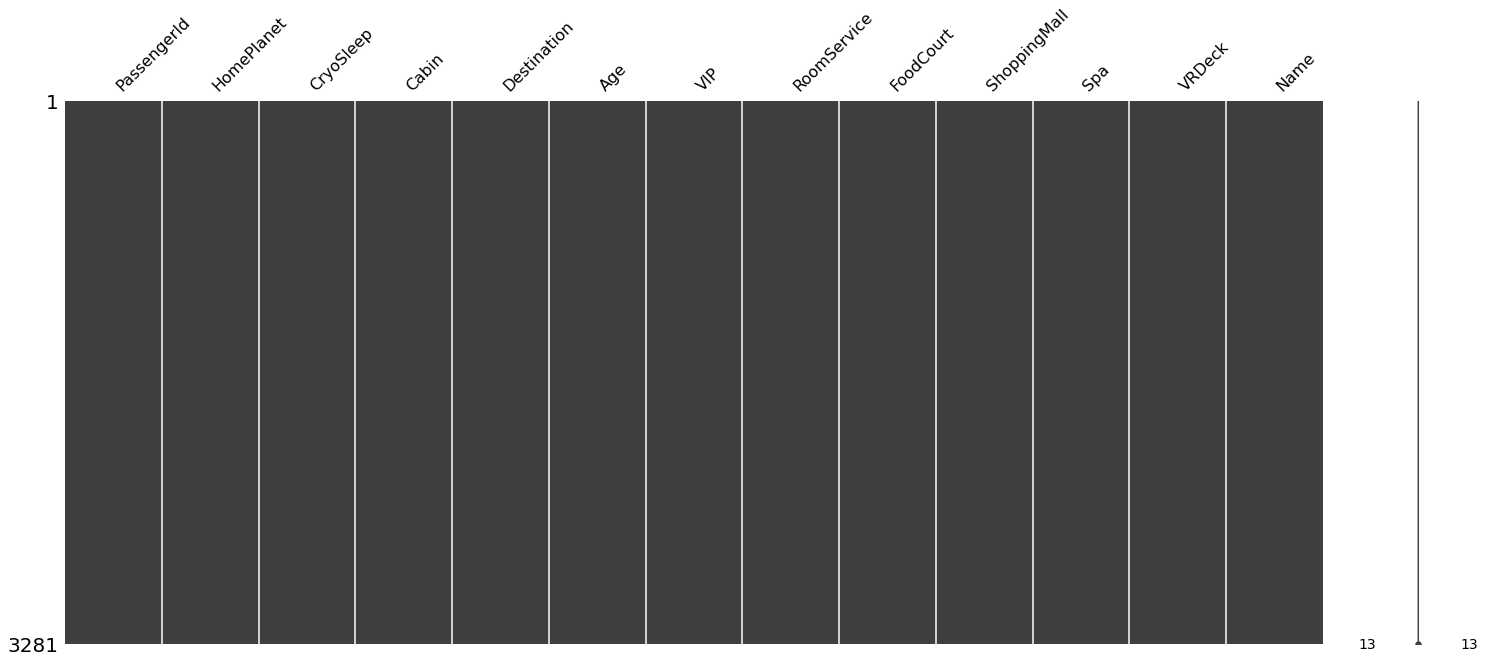

In [147]:
test_data.dropna(how='any', axis=0, inplace=True)
msno.matrix(test_data)

## Data wrangling

In [148]:
# Replacing Booleand with dummy.
train_data[['CryoSleep', 'VIP', 'Transported']] = train_data[['CryoSleep', 'VIP', 'Transported']].replace([True, False],[1,0])
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0.0,A/0/S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0.0,A/0/S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0.0,F/1/S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [149]:
# lets create 3 new columns from 'Cabin'.
# 'Deck' - using the first letter.
# 'CabinNum' - using the number in the middle.
# 'Side' - using the third letter.

pattern_cabin = '(\w)/(\d*)/(\w)'
pattern_cabin_re = re.compile(pattern_cabin, flags=re.IGNORECASE)

result_serie_cabin_train = train_data['Cabin'].apply(lambda x: x if x is np.NaN else pattern_cabin_re.search(x))

train_data['CabinDeck'] = result_serie_cabin_train.apply(lambda x: x if x is np.NaN else x.group(1))

train_data['CabinNum'] = result_serie_cabin_train.apply(lambda x: x if x is np.NaN else x.group(2))

train_data['CabinSide'] = result_serie_cabin_train.apply(lambda x: x if x is np.NaN else x.group(3))

train_data[['Cabin', 'CabinDeck', 'CabinNum', 'CabinSide']].sample(5)

,Cabin,CabinDeck,CabinNum,CabinSide
4697,F/952/S,F,952,S
6450,E/450/S,E,450,S
2877,G/488/S,G,488,S
7257,G/1253/S,G,1253,S
5803,C/230/S,C,230,S


In [150]:
# Now we create 2 new columns out of 'PassangerId'.
# 'PassengerGroup' - with the numbers before the underscore
# 'PassengerNumber' - with the numbers after the underscore

pattern_passenger = '(\d+)_(\d+)'
pattern_passenger_re = re.compile(pattern_passenger)

result_serie_passenger_train = train_data['PassengerId'].apply(lambda x: x if x is np.NaN else pattern_passenger_re.search(x))

train_data['PassengerGroup'] = result_serie_passenger_train.apply(lambda x: x if x is np.NaN else x.group(1))

train_data['PassengerNumber'] = result_serie_passenger_train.apply(lambda x: x if x is np.NaN else x.group(2))

train_data[['PassengerId', 'PassengerGroup', 'PassengerNumber']].sample(5)

,PassengerId,PassengerGroup,PassengerNumber
7500,8023_02,8023,02
3671,3942_01,3942,01
7450,7972_02,7972,02
4500,4783_01,4783,01
7197,7691_01,7691,01


In [151]:
# Drop 'Cabin' Column.
train_data.drop(columns=['Cabin', 'PassengerId'], inplace=True)

# Reordering columns.
train_data = train_data[['PassengerGroup', 'PassengerNumber','HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNum', 'CabinSide', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']]

In [152]:
# Let's do the same with test data.
test_data[['CryoSleep', 'VIP']] = test_data[['CryoSleep', 'VIP']].replace([True, False],[1,0])

result_serie_cabin_test = test_data['Cabin'].apply(lambda x: x if x is np.NaN else pattern_cabin_re.search(x))

test_data['CabinDeck'] = result_serie_cabin_test.apply(lambda x: x if x is np.NaN else x.group(1))

test_data['CabinNum'] = result_serie_cabin_test.apply(lambda x: x if x is np.NaN else x.group(2))

test_data['CabinSide'] = result_serie_cabin_test.apply(lambda x: x if x is np.NaN else x.group(3))

In [153]:
result_serie_passenger_test = test_data['PassengerId'].apply(lambda x: x if x is np.NaN else pattern_passenger_re.search(x))

test_data['PassengerGroup'] = result_serie_passenger_test.apply(lambda x: x if x is np.NaN else x.group(1))

test_data['PassengerNumber'] = result_serie_passenger_test.apply(lambda x: x if x is np.NaN else x.group(2))

test_data.drop(columns=['Cabin', 'PassengerId'], inplace=True)

test_data = test_data[['PassengerGroup', 'PassengerNumber', 'HomePlanet', 'CryoSleep', 'CabinDeck', 'CabinNum', 'CabinSide', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']]

In [154]:
train_data.head()

,PassengerGroup,PassengerNumber,HomePlanet,CryoSleep,CabinDeck,CabinNum,CabinSide,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001,01,Europa,0.0,B,0,P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002,01,Earth,0.0,F,0,S,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003,01,Europa,0.0,A,0,S,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003,02,Europa,0.0,A,0,S,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004,01,Earth,0.0,F,1,S,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


## EDA

In [155]:
# Checking for each 'HomePlanet' what 'CabinDeck' classes are.
data_plot = train_data.groupby(['HomePlanet', 'CabinDeck']).size()

fig = make_subplots(rows = 1, cols = 3, specs=[[{'type' : 'domain'} , {'type' : 'domain'}, {'type' :'domain'}]], subplot_titles=('Earth' , 'Europa', 'Mars'))

plt_earth = go.Pie(labels= data_plot['Earth'].index, values= data_plot['Earth'].values, name= 'Earth')

plt_europa = go.Pie(labels= data_plot['Europa'].index, values= data_plot['Europa'].values, name= 'Europa')

plt_mars = go.Pie(labels= data_plot['Mars'].index, values= data_plot['Mars'].values, name= 'Mars')

fig.add_trace(plt_earth,row=1,col=1)
fig.add_trace(plt_europa, row=1, col=2)
fig.add_trace(plt_mars,row=1,col=3)

fig.show()

Here we can observe that depending on the HomePlanet, there is a relation with CabinDeck:
- Earth on E, F, G 
- Europa on A, B, C, D, E, T
- Mars on D, E, F

In [156]:
# Checking if all Passengers in the same group are on the same 'CabinSide'.
# For that we create a new DF without Nans, so leght are equals.
compare_data = train_data.dropna(how='any',axis=0)
# CabinSide per PassengerGroup
cabinside_group = compare_data.groupby(['PassengerGroup','CabinSide']).size()

# Amount of passengers on a group
passengers_group = compare_data.groupby(['PassengerGroup']).size()

# We check if lenght are equals, if they are equals, means that 
# value counts are equal, so grouping with cabinside wont matter
# because people in the same group have the same Cabin.
len(cabinside_group) == len(passengers_group)


True

In [157]:
# Checking if all Passengers in the same group are on the same 'CabinDeck'.
cabindeck_group = compare_data.groupby(['PassengerGroup','CabinDeck']).size()
len(cabindeck_group) == len(passengers_group)


False

What we proved above is that persons in the same group, travel in the same CabinSide, but not necessarily on same CabinDeck

In [158]:
# Lets obtain all passanger that are in the same group.
multiple_passenger = train_data.groupby(['PassengerGroup']).size()
multiple_passenger = multiple_passenger[multiple_passenger > 1].index

# Gettin the billed amount each group has spend.
amount_billed = train_data.groupby(['HomePlanet', 'CabinDeck', 'PassengerGroup'])[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean().reset_index()

# Creating a mask, to obtain all groups with more than one passenger.
mask_multiple_passengers = [True if element in multiple_passenger else False for element in amount_billed['PassengerGroup']]
# Mask to obtain null bills.
mask_null_bills = ((amount_billed['RoomService'] == 0) & (amount_billed['FoodCourt'] == 0) & (amount_billed['ShoppingMall'] == 0) & (amount_billed['Spa'] == 0) & (amount_billed['VRDeck'] == 0))

# Aplying mask.
zero_amount_billed = amount_billed[mask_multiple_passengers & mask_null_bills]

# Grouping again so its easyer to plot.
data_plot = zero_amount_billed.groupby(['HomePlanet', 'CabinDeck']).size()

fig = make_subplots(rows = 1, cols = 3, specs=[[{'type' : 'domain'} , {'type' : 'domain'}, {'type' :'domain'}]], subplot_titles=('Earth' , 'Europa', 'Mars'))

plt_earth = go.Pie(labels= data_plot['Earth'].index, values= data_plot['Earth'].values, name= 'Earth')

plt_europa = go.Pie(labels= data_plot['Europa'].index, values= data_plot['Europa'].values, name= 'Europa')

plt_mars = go.Pie(labels= data_plot['Mars'].index, values= data_plot['Mars'].values, name= 'Mars')

fig.add_trace(plt_earth,row=1,col=1)
fig.add_trace(plt_europa, row=1, col=2)
fig.add_trace(plt_mars,row=1,col=3)

fig.show()

In groups with several CabinDecks, people with no bill are necessarily on CabinDeck:
* Earth on G
* Europa on B
* Mars on F

In [159]:
# Lets check if people in the same group are from the same HomePlanet.
# For that we create a new DF without Nans, so leght are equals.
compare_data = train_data.dropna(how='any',axis=0)
# Checking how much passengers are in a group depending their home planet. 
planet_passenger_group = compare_data.groupby(['HomePlanet', 'PassengerGroup']).size()

# Amount of passengers in a group
passengers_group = compare_data.groupby(['PassengerGroup']).size()

# We check if lenght are equals, if they are equals, means that 
# value counts are equal, so grouping with cabinside wont matter
# because people in the same group have the same Cabin.
len(planet_passenger_group) == len(passengers_group)


True

Here we can observe that people in a group have the same homeplanet.

In [160]:
data_plot = train_data.groupby(['HomePlanet', 'Destination']).size()

fig = make_subplots(rows = 1, cols = 3, specs=[[{'type' : 'domain'} , {'type' : 'domain'}, {'type' :'domain'}]], subplot_titles=('Earth' , 'Europa', 'Mars'))

plt_earth = go.Pie(labels= data_plot['Earth'].index, values= data_plot['Earth'].values, name= 'Earth')

plt_europa = go.Pie(labels= data_plot['Europa'].index, values= data_plot['Europa'].values, name= 'Europa')

plt_mars = go.Pie(labels= data_plot['Mars'].index, values= data_plot['Mars'].values, name= 'Mars')

fig.add_trace(plt_earth,row=1,col=1)
fig.add_trace(plt_europa, row=1, col=2)
fig.add_trace(plt_mars,row=1,col=3)


A low percentage of Europa passengers travel to PSO j318.5-22

Hight percentage of people from Mars travel to TRAPIST-1e

In [161]:
data_plot = train_data.groupby(['HomePlanet', 'VIP']).size()

fig = make_subplots(rows = 1, cols = 3, specs=[[{'type' : 'domain'} , {'type' : 'domain'}, {'type' :'domain'}]], subplot_titles=('Earth' , 'Europa', 'Mars'))

plt_earth = go.Pie(labels= data_plot['Earth'].index, values= data_plot['Earth'].values, name= 'Earth')

plt_europa = go.Pie(labels= data_plot['Europa'].index, values= data_plot['Europa'].values, name= 'Europa')

plt_mars = go.Pie(labels= data_plot['Mars'].index, values= data_plot['Mars'].values, name= 'Mars')

fig.add_trace(plt_earth,row=1,col=1)
fig.add_trace(plt_europa, row=1, col=2)
fig.add_trace(plt_mars,row=1,col=3)

Earth has no VIP passengers